# **Project 7 - Introduction to Machine Learning**
**Author:** Sean StClair

[Project 7 Github Repository](https://github.com/SMStclair/datafun-07-ml)



In [28]:
# Standard library imports
import os
import sys

# Third-party library imports
import numpy as np
import pandas as pd
import pyarrow
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from scipy import stats

## **CC 7.5 - Chart a Straight Line (Part 1)**

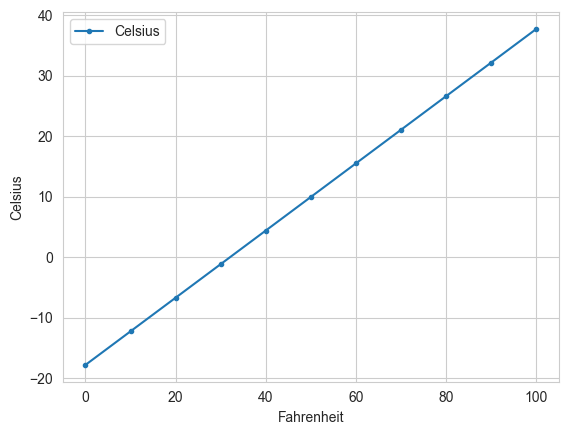

In [29]:
# Define the lambda function to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Generate temperature data for Fahrenheit from 0 to 100 in steps of 10
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create DataFrame from the list of tuples
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot the data with a solid line and markers
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## **CC 7.6: Predict Avg High Temp in NYC in January (Part 2)**

### *CC 7.6 - Section 1: Data Acquisition*

In [30]:
# Read the CSV file 'ave_hi_nyc_jan_1895-2018.csv' into a DataFrame
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

###  *CC 7.6 - Section 2: Data Inspection*

In [31]:
# Display the first few rows of the DataFrame
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [32]:
# Display the last few rows of the DataFrame
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### *CC 7.6 - Section 3: Data Cleaning*

In [33]:
# Rename 'Value' column as 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display the first few rows of the DataFrame
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [34]:
# Check the column type Date
nyc_df.Date.dtype

dtype('int64')

In [35]:
# Rename 'Value' column as 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Floor divide the 'Date' column of the DataFrame by 100, to truncate the last two digits
nyc_df.Date = nyc_df.Date.floordiv(100)

# Display the first 3 rows of the DataFrame
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### *CC 7.6 - Section 4: Descriptive Statistics*

In [36]:
# Set the display precision for floating-point numbers to 2 decimal places
pd.set_option('display.precision', 2)

# Generate descriptive statistics for the 'Temperature' column of the DataFrame
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### *CC 7.6 - Section 5: Build the Model*

In [37]:
# Perform linear regression on the 'Date' and 'Temperature' columns
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

# Access the slope and intercept values
slope = linear_regression.slope  # Slope of the linear regression line
intercept = linear_regression.intercept  # Intercept of the linear regression line

# Print the slope and intercept values
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.014771361132966163
Intercept: 8.694993233674289


### *CC 7.6 - Section 6: Predict*

In [38]:
# Calculate the predicted temperature for the year 2024 using the linear regression equation:
# y = slope * x + intercept, where x is the year (2019 in this case)

linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [39]:
# Approximating January 1890 average tempature
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### *CC 7.6 - Section 7: Visualizations*

(10.0, 70.0)

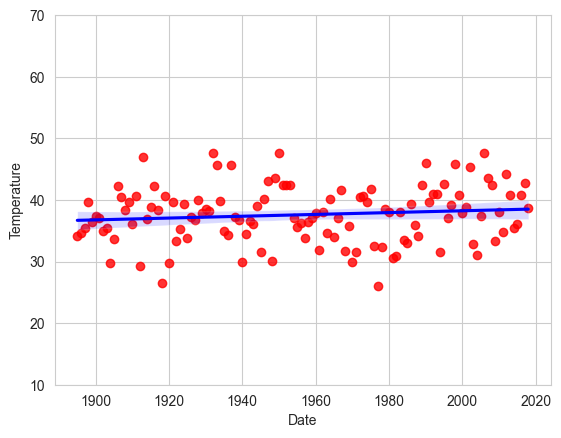

In [40]:
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, color='blue', scatter_kws={'color': 'red'})

axes.set_ylim(10, 70)

## **CC 7.7: Predict Avg High Temp in NYC in January (Part 3)

### *CC 7.7 - Section 1: Build the Model

In [41]:
# Importing the pandas library as pd for data manipulation
import pandas as pd

# Reading the CSV file containing NYC temperature data into a DataFrame
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Renaming the columns of the DataFrame for better readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Converting the 'Date' column to represent years only by removing the month and day information
nyc_df.Date = nyc_df.Date.floordiv(100)

# Displaying the first three rows of the DataFrame to check the data
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [42]:
# Splitting the data into training and testing sets using train_test_split function

X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1),  # Independent variable 'Date' reshaped into a 2D array
     nyc_df.Temperature.values,  # Dependent variable 'Temperature'
     random_state=11)  # Seed for random number generation to ensure reproducibility

In [43]:
# Print the shape of the training feature dataset X_train

X_train.shape

(93, 1)

In [44]:
# Print the shape of the testing feature dataset X_test

X_test.shape

(31, 1)

In [45]:
# Training the model

# Importing the LinearRegression class from the scikit-learn library
from sklearn.linear_model import LinearRegression

# Instantiating a LinearRegression object
linear_regression = LinearRegression()

# Fitting the linear regression model to the training data
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [46]:
# Retrieve the coefficients of the linear regression model

linear_regression.coef_

array([0.01939167])

In [47]:
# Retrieve the intercept of the linear regression model

linear_regression.intercept_

-0.30779820252656975

### *CC 7.7 - Section 2: Test the Model*

In [48]:
# Making predictions using the fitted linear regression model on the testing data
predicted = linear_regression.predict(X_test)

# Storing the actual values from the testing data
expected = y_test

# Printing a subset of predicted and expected values for comparison
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### *CC 7.7 - Section 3: Predict*

In [49]:
# Predicting Future Temperatures and Estimating Past Temperatures

predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [50]:
# Predicting the temperature for 2024 using the trained linear regression model

predict(2024)

array([38.94094855])

In [51]:
# Predicting the temperature for 1890 using the trained linear regression model

predict(1890)

array([36.34246432])

### *CC 7.7 - Section 4: Visualizations*

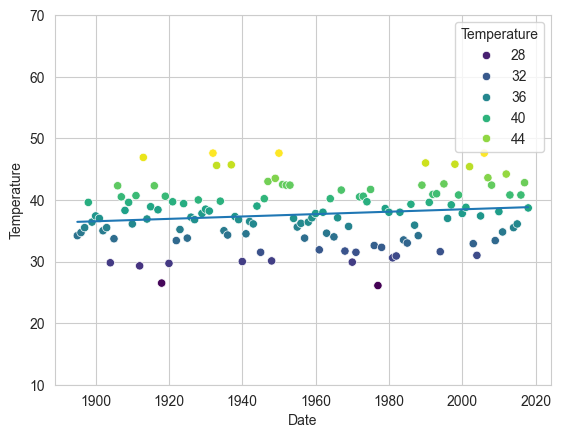

In [52]:
# Creating a scatter plot to visualize the relationship between Date and Temperature
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='viridis', legend=True)

# Setting the y-axis limits to enhance visualization
axes.set_ylim(10, 70)

# Generating an array of x values
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

# Predicting the corresponding y values using the predict function
y = predict(x)

# Plotting the predicted linear regression line
line = plt.plot(x, y)

## **CC 7.8: Add Your Insights (Part 4)**

- Both Models found extremely similar but not identical outcomes to the same dataset.
- Confidence interval for Object-Oriented Programming (OOP) is a useful metric not present for Supervised Machine Learning (SML) chart.